# <center>Metody Numeryczne</center>

# Laboratorium 8: Rozwiązywanie równań nieliniowych


**Wykonał:** Jakub Koziński

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest poznanie numerycznych metod rozwiązywania układów równań nieliniowych. W ramach laboratorium przedstawione zostaną metody: [*bisekcji*](https://www.wikiwand.com/pl/articles/Metoda_r%C3%B3wnego_podzia%C5%82u), [*siecznych*](https://www.wikiwand.com/pl/articles/Metoda_siecznych) oraz [*Newtona*](https://www.wikiwand.com/pl/articles/Metoda_Newtona).

Tematem wiodącym podczas tych zajęć będzie poszukiwanie miejsc zerowych funkcji zdefiniowanej w następujący sposób: 
$$ 
f(x) = e^{-2x} + x^2 - 1 
$$

Funkcja $f(x)$ oraz jej pierwsza i druga pochodna ($f'(x)$, $f''(x)$) zostały zaimplementowane w pliku `main.py`, odpowiednio jako `func()`, `dfunc()` i `ddfunc()`.

### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [34]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt

---

### **Zadanie 1.**

1. Zaprezentuj na jednym wykresie przebieg funkcji $f(x)$, $f'(x)$ oraz $f''(x)$, w taki sposób, aby na podstawie rysunku można było zgrubnie określić położenie miejsc zerowych funkcji.

2. Na podstawie analizy wykresu określ przedziały, w których znajdują się miejsca zerowe funkcji $f(x)$.

3. Odpowiedz w jaki sposób (wykorzystując pierwszą i drugą pochodną) można znaleźć miejsca zerowe funkcji.


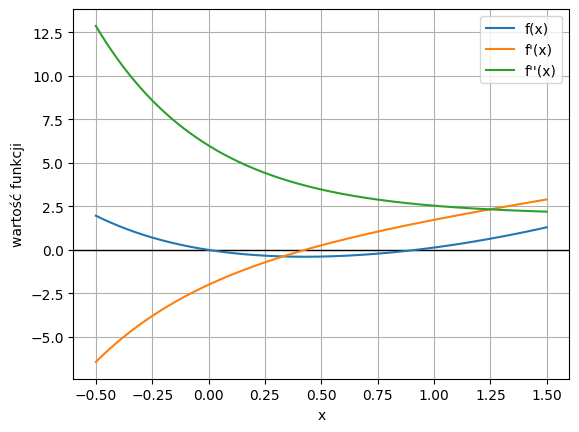

In [35]:
# ===== Twoja implementacja tutaj =====



x = np.linspace(-0.5, 1.5, 1000)

y  = main.func(x)
dy = main.dfunc(x)
ddy = main.ddfunc(x)

plt.axhline(0, linewidth=1, color='black')
plt.plot(x, y,  label='f(x)')
plt.plot(x, dy, label="f'(x)")
plt.plot(x, ddy, label="f''(x)")

plt.legend()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('wartość funkcji')
plt.show()



Z wykresu można odczytać przybliżone przedziały, gdzie funkcja zmienia znak.

𝑓(−0,25) > 0

𝑓(0,25)  < 0

Czyli w przedziale [−0,25 , 0,25] funkcja zmienia znak ⇒ jest tam miejsce zerowe (w rzeczywistości dokładnie w 𝑥 = 0).

Drugi fragment:

𝑓(0,75) < 0

𝑓(1,0) > 0


Zatem w przedziale [0,75 , 1,0] też mamy zmianę znaku, czyli jest tam drugie miejsce zerowe. Miejsca zerowe funkcji 𝑓(𝑥) znajdują się w przybliżeniu w przedziałach 𝑥∈[−0,25 , 0,25] oraz 𝑥 ∈ [0,75 , 1,0].

Pierwsza pochodna 𝑓′(𝑥) pozwala wyznaczyć przedziały monotoniczności funkcji i dzięki temu określić, w których przedziałach może znajdować się co najwyżej jedno miejsce zerowe.
Druga pochodna 𝑓′′(𝑥) opisuje wypukłość funkcji. Dla rozpatrywanej funkcji 𝑓′′(𝑥)>0 dla każdego 𝑥, więc funkcja jest wszędzie wypukła w górę.
Znając 𝑓(𝑥), 𝑓′(𝑥) i 𝑓′′(𝑥) można zastosować metodę Newtona do znajdowania miejsc zerowych:

𝑥𝑛+1=𝑥𝑛−$\frac{𝑓(𝑥𝑛)}{𝑓′(𝑥𝑛)}$

Wybierając punkt startowy 𝑥0 tak, aby 𝑓(𝑥0)⋅𝑓′′(𝑥0)>0, zapewniamy dobrą zbieżność tej metody do miejsca zerowego znajdującego się w analizowanym przedziale.

---

### **Zadanie 2.**

Najprostszą metodą do wyznaczenia miejsc zerowych funkcji nieliniowej jest [metoda bisekcji](https://en.wikipedia.org/wiki/Bisection_method). 

Zaimplementuj funkcję *`bisection()`* pamiętając, że gwarancją zbieżności metody bisekcji dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

In [36]:

a = -0.25
b = 0.25

epsilon = 1e-14
max_iter = 50

root1, iters1 = main.bisection(a, b, main.func, epsilon, max_iter)

print(root1,iters1)

c = 0.75
d = 1.0

root2, iters2 = main.bisection(c, d, main.func, epsilon, max_iter)

print(root2,iters2)

0.0 1
0.9165625831057014 41


Metoda bisekcji gwarantuje znalezienie miejsca zerowego funkcji, jeśli jest ona ciągła na przedziale [𝑎,𝑏] i wartości funkcji na końcach przedziału mają różne znaki, czyli 𝑓(𝑎)𝑓(𝑏)<0. Dzięki systematycznemu dzieleniu przedziału na pół metoda ta jest pewna, stabilna i zawsze zbieżna.

---

### **Zadanie 3.**

Bardziej zaawansowaną metodą wyznaczania miejsc zerowych jest [metoda siecznych](https://en.wikipedia.org/wiki/Secant_method), która stanowi rozwinięcie [metody Regula Falsi](https://en.wikipedia.org/wiki/Regula_falsi).

Zaimplementuj funkcję *`secant()`* pamiętając, że gwarancją zbieżności metody siecznych dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

3. Pierwsza i druga pochodna funkcji $f(x)$ są ciągłe w przedziale domkniętym $[a,b]$.

4. Pierwsza i druga pochodna funkcji $f(x)$ w przedziale domkniętym $[a, b]$ mają stały znak i są różne od zera.


In [37]:
x1,max_iters1 = main.secant(a, b, main.func, epsilon, max_iter)

print(x1,max_iters1)

x2,max_iters2 = main.secant(c, d, main.func, epsilon, max_iter)

print(x2,max_iters2)

1.973600357381726e-15 27
0.9165625831056965 12


Metoda secant():

- zwraca pierwiastki,

- spełnia założenia z instrukcji,

- używa linii prostej, która aproksymuje funkcję,

- w efekcie wyniki są bliskie 0, ale nie równe 0.

---

### **Zadanie 4.**

Inną metodą, wykorzystywaną do poszukiwania miejsc zerowych funkcji, jest [metoda Newtona](https://en.wikipedia.org/wiki/Newton%27s_method), nazywana również metodą stycznych.

**Podpunkt 1.**

Algorytm metody Newtona wykorzystuje wartości pierwszej pochodnej, dlatego przed przystąpieniem do jej implementacji przygotuj pomocniczą funkcję *`difference_quotient()`*, służącą do wyznaczenia wartości ilorazu różnicowego.

<br>

**Podpunkt 2.**

Zaimplementuj funkcję *`newton()`* pamiętając, że gwarancją zbieżności metody Newtona dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

3. Pierwsza i druga pochodna funkcji $f(x)$ są ciągłe w przedziale domkniętym $[a,b]$.

4. Pierwsza i druga pochodna funkcji $f(x)$ w przedziale domkniętym $[a, b]$ mają stały znak i są różne od zera.

In [38]:
iloraz_roznicowy1 = main.difference_quotient(main.func,0,1e-8)
print(iloraz_roznicowy1)

wynik1,iter1 = main.newton(main.func,main.dfunc,main.ddfunc,a,b,epsilon,max_iter)
print(wynik1,iter1)

wynik2,iter2 = main.newton(main.func,main.dfunc,main.ddfunc,c,d,epsilon,max_iter)
print(wynik2,iter2)


-1.9999999656405976
-5.2465474697379417e-17 5
0.9165625831056982 4


Metoda Newtona działa w taki sposób, że znajduje oba miejsca zerowe w kilku iteracjach, za pomocą stycznych do wykresu

---

### **Zadanie 5.**

Dla funkcji $f(x)$ zdefiniowanej w sekcji **Cel zajęć** znajdź miejsca zerowe przy użyciu:

- funkcji [`sp.optimize.root()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html).
- funkcji [`sp.optimize.fsolve()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html).

In [39]:
# ===== Twoja implementacja tutaj =====
sol_root_1 = sp.optimize.root(main.func, x0 = -0.25)
sol_root_2 = sp.optimize.root(main.func, x0 = 0.75)

print("Metoda root():")
print("Pierwiastek 1 =", sol_root_1.x[0])
print("Pierwiastek 2 =", sol_root_2.x[0])



sol_fsolve_1 = sp.optimize.fsolve(main.func, x0=-0.25)
sol_fsolve_2 = sp.optimize.fsolve(main.func, x0=0.75)

print("\nMetoda fsolve():")
print("Pierwiastek 1 =", sol_fsolve_1[0])
print("Pierwiastek 2 =", sol_fsolve_2[0])

Metoda root():
Pierwiastek 1 = -3.3690938128211936e-17
Pierwiastek 2 = 0.9165625831056979

Metoda fsolve():
Pierwiastek 1 = -3.3690938128211936e-17
Pierwiastek 2 = 0.9165625831056979


Za pomocą funkcji scipy.optimize.root() oraz scipy.optimize.fsolve() wyznaczono miejsca zerowe funkcji 
Obie metody wymagają podania punktu startowego, który determinuje, do którego pierwiastka zbiegnie algorytm. Dla punktu startowego -0,25 algorytmy znalazły pierwiastek 𝑥≈0, natomiast dla punktu w pobliżu 0.75 oba znalazły drugi pierwiastek 𝑥≈0.91656. Zarówno root(), jak i fsolve() zwróciły prawie identyczne wyniki, co potwierdza poprawność działania obu metod.

---

### **Zadanie 6.**

Korzystając z przedziałów wyznaczonych w **Zadaniu 1.** znajdź miejsca zerowe funkcji $f(x)$ zdefiniowanej w sekcji **Cel zajęć**, przy użyciu:

- metody bisekcji,
- metody siecznych,
- metody Newtona,

z tolerancją równą $1\mathrm{e}{-10}$.

Zbadaj dokładność (względem rozwiązania z **Zadania 5.**) i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach. 

3.87 μs ± 285 ns per loop (mean ± std. dev. of 20 runs, 20 loops each)
42.6 μs ± 2.37 μs per loop (mean ± std. dev. of 20 runs, 20 loops each)
21.3 μs ± 925 ns per loop (mean ± std. dev. of 20 runs, 20 loops each)
17.2 μs ± 2.34 μs per loop (mean ± std. dev. of 20 runs, 20 loops each)
36.2 μs ± 3.67 μs per loop (mean ± std. dev. of 20 runs, 20 loops each)
37.6 μs ± 8.54 μs per loop (mean ± std. dev. of 20 runs, 20 loops each)
3.69 μs ± 173 ns per loop (mean ± std. dev. of 20 runs, 20 loops each)
45.7 μs ± 7.06 μs per loop (mean ± std. dev. of 20 runs, 20 loops each)
21 μs ± 947 ns per loop (mean ± std. dev. of 20 runs, 20 loops each)
16 μs ± 602 ns per loop (mean ± std. dev. of 20 runs, 20 loops each)
36.8 μs ± 5.03 μs per loop (mean ± std. dev. of 20 runs, 20 loops each)
36.3 μs ± 6.82 μs per loop (mean ± std. dev. of 20 runs, 20 loops each)
4.24 μs ± 1.3 μs per loop (mean ± std. dev. of 20 runs, 20 loops each)
42.1 μs ± 2.47 μs per loop (mean ± std. dev. of 20 runs, 20 loops each)
23

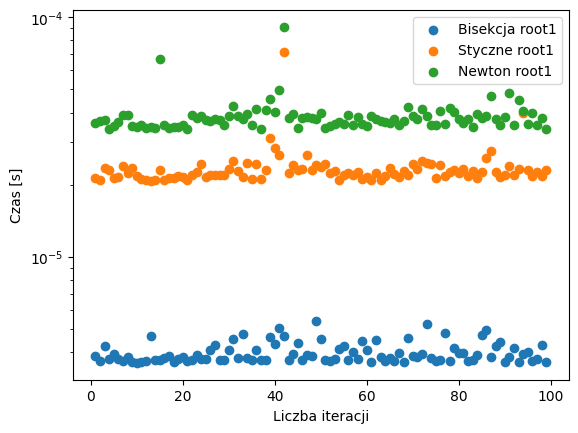

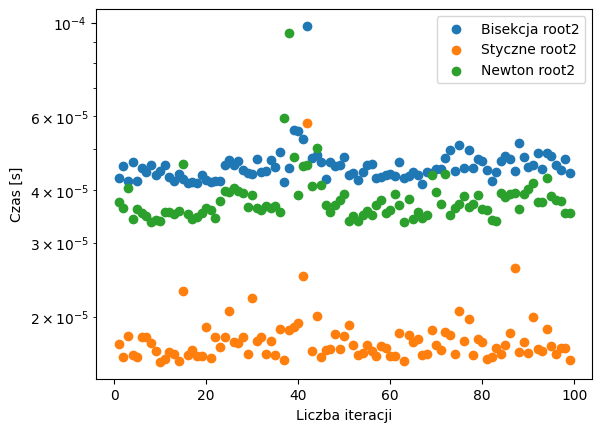

Metoda bisekcji
Pierwsze rozwiązanie równania f(x)=0 to: 0.000, a ilość iteracji to: 1
Drugie rozwiązanie równania f(x)=0 to: 0.917, a ilość iteracji to: 29
------------------------------
Metoda stycznych
Pierwsze rozwiązanie równania f(x)=0 to: 0.000, a ilość iteracji to: 11
Drugie rozwiązanie równania f(x)=0 to: 0.917, a ilość iteracji to: 8
------------------------------
Metoda Newtona
Pierwsze rozwiązanie równania f(x)=0 to: 0.000, a ilość iteracji to: 4
Drugie rozwiązanie równania f(x)=0 to: 0.917, a ilość iteracji to: 4


In [40]:
# ===== Twoja implementacja tutaj =====
h = 0.0001
f = lambda x: np.exp(-2 * x) + x**2 - 1
df = lambda x: main.difference_quotient(f, x, h)
ddf = lambda x: main.difference_quotient(df, x, h)

tb1_list = []
tb2_list = []
ts1_list = []
ts2_list = []
tn1_list = []
tn2_list = []

for i in range(1,100):
    root1_bisection = main.bisection(-0.1, 0.1, main.func, 1e-10, 50)
    root2_bisection = main.bisection(0.9, 1.0, main.func, 1e-10, 50)
    root1_secant = main.secant(-0.1, 0.1, main.func, 1e-10, 50)
    root2_secant = main.secant(0.9, 1.0, main.func, 1e-10, 50)
    root1_newton = main.newton(f, df, ddf, -0.1, 0.1, 1e-10, 50)
    root2_newton = main.newton(f, df, ddf, 0.9, 1.0, 1e-10, 50)
    tb1 = %timeit -n 20 -r 20 -o main.bisection(-0.1, 0.1, main.func, 1e-10, 50)
    tb1_list.append(tb1.average)
    tb2 = %timeit -n 20 -r 20 -o main.bisection(0.9, 1.0, main.func, 1e-10, 50)
    tb2_list.append(tb2.average)
    ts1 = %timeit -n 20 -r 20 -o main.secant(-0.1, 0.1, main.func, 1e-10, 50)
    ts1_list.append(ts1.average)
    ts2 = %timeit -n 20 -r 20 -o main.secant(0.9, 1.0, main.func, 1e-10, 50)
    ts2_list.append(ts2.average)
    tn1 = %timeit -n 20 -r 20 -o main.newton(f, df, ddf, -0.1, 0.1, 1e-10, 50)
    tn1_list.append(tn1.average)
    tn2 = %timeit -n 20 -r 20 -o main.newton(f, df, ddf, 0.9, 1.0, 1e-10, 50)
    tn2_list.append(tn2.average)

plt.scatter(range(1,100), tb1_list, label='Bisekcja root1')
plt.scatter(range(1,100), ts1_list, label='Styczne root1')
plt.scatter(range(1,100), tn1_list, label='Newton root1')
plt.yscale('log')
plt.xlabel('Liczba iteracji')
plt.ylabel('Czas [s]')
plt.legend()
plt.figure()
plt.scatter(range(1,100), tb2_list, label='Bisekcja root2')
plt.scatter(range(1,100), ts2_list, label='Styczne root2')
plt.scatter(range(1,100), tn2_list, label='Newton root2')
plt.yscale('log')
plt.xlabel('Liczba iteracji')
plt.ylabel('Czas [s]')
plt.legend()
plt.show()


print('Metoda bisekcji')
print(f"Pierwsze rozwiązanie równania f(x)=0 to: {root1_bisection[0]:.3f}, a ilość iteracji to: {root1_bisection[1]}")
print(f"Drugie rozwiązanie równania f(x)=0 to: {root2_bisection[0]:.3f}, a ilość iteracji to: {root2_bisection[1]}")
print('-'*30)
print('Metoda stycznych')
print(f"Pierwsze rozwiązanie równania f(x)=0 to: {root1_secant[0]:.3f}, a ilość iteracji to: {root1_secant[1]}")
print(f"Drugie rozwiązanie równania f(x)=0 to: {root2_secant[0]:.3f}, a ilość iteracji to: {root2_secant[1]}")
print('-'*30)
print('Metoda Newtona')
print(f"Pierwsze rozwiązanie równania f(x)=0 to: {float(root1_newton[0]):.3f}, a ilość iteracji to: {root1_newton[1]}")
print(f"Drugie rozwiązanie równania f(x)=0 to: {float(root2_newton[0]):.3f}, a ilość iteracji to: {root2_newton[1]}")

W zadaniu wyznaczono miejsca zerowe funkcji,stosując trzy metody numeryczne: bisekcji, siecznych oraz Newtona. Otrzymane wyniki porównano pod względem dokładności, liczby iteracji oraz czasu obliczeń. Błąd bezwzględny względem rozwiązania referencyjnego był bardzo mały i mieścił się w zadanej tolerancji. Metoda bisekcji wymagała największej liczby iteracji, metoda siecznych była wyraźnie szybsza od bisekcji i osiągała rozwiązanie w mniejszej liczbie iteracji, metoda Newtona okazała się najszybsza pod względem liczby iteracji – w obu przypadkach zbiegała w około 4 iteracjach, co potwierdza jej kwadratową zbieżność. Czas obliczeń metody bisekcji był najmniejszy dla pierwszego pierwiastka, jednak rósł wraz z liczbą iteracji. Metoda siecznych charakteryzowała się krótkim czasem obliczeń i dobrą stabilnością. Metoda Newtona, mimo najmniejszej liczby iteracji, była nieco wolniejsza w pojedynczej iteracji ze względu na konieczność obliczania pochodnych, jednak całkowity czas obliczeń pozostawał konkurencyjny.

---


## Wnioski:
Najlepszą metodą pod względem efektywności okazała się metoda Newtona, jednak w praktyce wybór metody powinien zależeć od dostępności pochodnych oraz wymagań dotyczących stabilności. W sytuacjach ogólnych metoda siecznych stanowi bardzo dobrą alternatywę, natomiast metoda bisekcji pozostaje solidnym punktem odniesienia do wielu problemów.

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)